In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.special import erf
from scipy.stats import binom
import pandas as pd
from scipy.special import factorial
import mpmath
import multiprocessing
from joblib import Parallel, delayed
from scipy.integrate import nquad

# Use optimal number of jobs for parallel processing
optimal_n_jobs = multiprocessing.cpu_count()
mpmath.mp.dps=1000
# Constants
D1 = 0.2  # Diffusive Constant
D2=0.01
rho_a = 1.5
rho_b=0.5  # Densitya
L = 2000 # lower limit of particle's position  ######################################
t_1 = 10 # The time we want to see
t_2=20
N_a=int(L*rho_a)
N_b=int(L*rho_b)
N=N_a+N_b

alpha=2
tao=100



def sigma(t):
    return np.sqrt(  (2 *t *(D1 + D2*(alpha**2)*(tao**2)))   - (D2 *(alpha**2) *(tao**3) *(1-mpmath.exp(-t/tao)) *(3-mpmath.exp(-t/tao)))  )

def beta(t):
    return alpha*tao*(1-mpmath.exp(-t/tao))

def sigma_til(t):
    return np.sqrt(sigma(t)**2 + D2*tao*(beta(t)**2))
def kappa_sq(t):
    return D2*tao*(1-mpmath.exp(-2*t/tao))

def neu(t):
    return alpha*tao*mpmath.tanh(t/(2*tao))
sigma_1=sigma(t_1)
sigma_2=sigma(t_2)
til_sigma_1=sigma_til(t_1)
til_sigma_2=sigma_til(t_2)
sigma_til_1=sigma_til(t_1)
sigma_til_2=sigma_til(t_2-t_1)
beta_2=beta(t_2)
beta_1=beta(t_1)
kappa_sq_1=kappa_sq(t_1)
neu_1=neu(t_1)
f_1=kappa_sq_1*neu_1*mpmath.exp(t_1/tao)+beta_1*D2*tao
til_w=(til_sigma_1**2)+(beta_2-beta_1)*f_1

prob_abb= 0.0009677627713899955
prob_bab= 1.830055408346964e-05
prob_aab= 0.0009677627713899955
prob_baa= 0.0029032883141699864
prob_aba= 5.490166225040891e-05
prob_bba= 0.0029032883141699864

In [21]:
t1=t_1
t2=t_2
# Define the functions
def sigma(t, D1, D2, alpha, tao):
    return np.sqrt(
        (2 * t * (D1 + D2 * (alpha**2) * (tao**2))) 
        - (D2 * (alpha**2) * (tao**3) * (1 - np.exp(-t / tao)) * (3 - np.exp(-t / tao)))
    )

def beta(t, alpha, tao):
    return alpha * tao * (1 - np.exp(-t / tao))

def sigma_til(t, D1, D2, alpha, tao):
    return np.sqrt(sigma(t, D1, D2, alpha, tao)**2 + D2 * tao * beta(t, alpha, tao)**2)

def kappa_sq(t, D2, tao):
    return D2 * tao * (1 - np.exp(-2 * t / tao))

def neu(t, alpha, tao):
    return alpha * tao * np.tanh(t / (2 * tao))

# Compute values
sigma_1 = sigma(t1, D1, D2, alpha, tao)
sigma_2 = sigma(t2, D1, D2, alpha, tao)

til_sigma_1 = sigma_til(t1, D1, D2, alpha, tao)
til_sigma_2 = sigma_til(t2, D1, D2, alpha, tao)

beta_1 = beta(t1, alpha, tao)
beta_2 = beta(t2, alpha, tao)

kappa_sq_1 = kappa_sq(t1, D2, tao)
neu_1 = neu(t1, alpha, tao)

f_1 = kappa_sq_1 * neu_1 * np.exp(t1 / tao) + beta_1 * D2 * tao
til_w = (til_sigma_1**2) + (beta_2 - beta_1) * f_1

# Output results
print(f"sigma_1: {sigma_1}")
print(f"sigma_2: {sigma_2}")
print(f"til_sigma_1: {til_sigma_1}")
print(f"til_sigma_2: {til_sigma_2}")
print(f"beta_1: {beta_1}")
print(f"beta_2: {beta_2}")
print(f"kappa_sq_1: {kappa_sq_1}")
print(f"neu_1: {neu_1}")
print(f"f_1: {f_1}")
print(f"til_w: {til_w}")

sigma_1: 5.362533229197892
sigma_2: 13.860687250332205
til_sigma_1: 19.773554128602186
til_sigma_2: 38.81314527629197
beta_1: 19.0325163928081
beta_2: 36.25384938440364
kappa_sq_1: 0.18126924692201818
neu_1: 9.991674991575994
f_1: 21.03418361512954
til_w: 753.2301231192691


In [14]:
Q1_samples=np.load('Q1_samples_4e3_2.npy',allow_pickle=True)
Q2_samples=np.load('Q2_samples_4e3_2.npy',allow_pickle=True)

In [10]:
len(Q1_samples)

10000000

In [ ]:
# Find the indices where Q1_samples is equal to 7
indices = np.where(Q1_samples_new == 7)

# Extract the corresponding values from Q2_samples
Q2_selected = Q2_samples_new[indices]

print(Q2_selected)

[11  7 10 ... 13 16 11]


In [330]:
bins=np.arange(min(Q2_selected),max(Q2_selected)+2)
prob_simu,Q2_Q1_7=np.histogram(Q2_selected,bins,density=True)
Q2_Q1_7=Q2_Q1_7[:-1]

In [15]:
bins1=np.arange(min(Q1_samples), max(Q1_samples) + 2)
bins2=np.arange(min(Q2_samples), max(Q2_samples) + 2)
prob_gamma, Q1_gammas, Q2_gammas = np.histogram2d(Q1_samples, Q2_samples, bins=(bins1, bins2),density=True)
Q1_gamma=Q1_gammas[:-1]
Q2_gamma=Q2_gammas[:-1]

In [445]:
Q1_gamma[18]

7

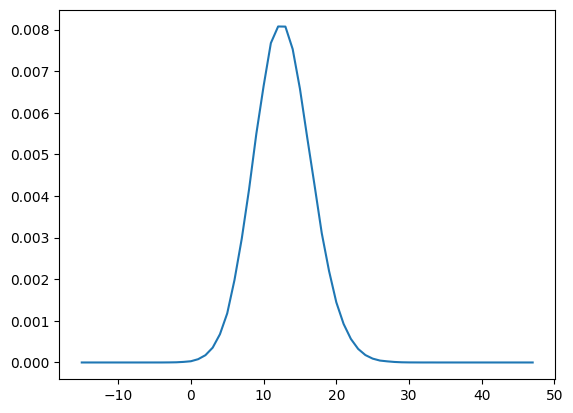

In [16]:
plt.plot(Q2_gamma,prob_gamma[18])

In [394]:
bins1=np.arange(min(Q1_samples_new), max(Q1_samples_new) + 2)
bins2=np.arange(min(Q2_samples_new), max(Q2_samples_new) + 2)
prob_gamma_new, Q1_gammas_new, Q2_gammas_new = np.histogram2d(Q1_samples_new, Q2_samples_new, bins=(bins1, bins2),density=True)
Q1_gamma_new=Q1_gammas_new[:-1]
Q2_gamma_new=Q2_gammas_new[:-1]


In [19]:
def mu_AA(lam_1, lam_2):
    term_11 = til_sigma_1 * rho_a * (np.exp(lam_1) - 1) / np.sqrt(2 * np.pi)
    term_12 = til_sigma_2 * rho_a * (np.exp(lam_2) - 1) / np.sqrt(2 * np.pi)
    arg_1 = np.sqrt(til_w**2 + (til_w**2 - (til_sigma_1**2) * (til_sigma_2**2))**2)  ### look here it's wrong ###
    arg_2 = np.sqrt(((til_w - til_sigma_1**2)**2) + (til_w**2 - (til_sigma_1**2) * (til_sigma_2**2))**2)
    arg = til_sigma_1 + ((arg_1 - arg_2) / til_sigma_1)
    term_13 = rho_a * (np.exp(lam_1) - 1) * (np.exp(lam_2) - 1) * arg / (2 * np.sqrt(2 * np.pi))
    term_21 = til_sigma_1 * rho_b * (np.exp(-lam_1) - 1) / np.sqrt(2 * np.pi)
    term_22 = til_sigma_2 * rho_b * (np.exp(-lam_2) - 1) / np.sqrt(2 * np.pi)
    term_23 = rho_b * (np.exp(-lam_1) - 1) * (np.exp(-lam_2) - 1) * arg / (2 * np.sqrt(2 * np.pi))
    return term_11 + term_12 + term_13 + term_21 + term_22 + term_23

In [18]:
##### Defining the generating function ####
def g_AA(lam_1,lam_2):
    return np.exp(mu_AA(lam_1,lam_2))

In [75]:
from scipy.integrate import dblquad


# Define the inverse Laplace transform
def inverse_laplace_transform_2d(func, t1, t2, s1_min=-2, s1_max=2, s2_min=-2, s2_max=2, N=100):
    """
    Numerically computes the inverse Laplace transform in two variables.

    Parameters:
    - func: The Laplace-transformed function (e.g., g_AA).
    - t1, t2: Time (or parameter) for which to compute the inverse transform.
    - s1_min, s1_max: Limits for the integration over s1.
    - s2_min, s2_max: Limits for the integration over s2.
    - N: Number of discretization points.

    Returns:
    - Inverse Laplace transformed value at (t1, t2).
    """
    def integrand(s1, s2):
        return np.exp(-s1 * t1 -s2 * t2) * func(s1, s2).real
    
    # Numerical integration using SciPy's dblquad
    result, error = dblquad(
        integrand,
        s2_min, s2_max,  # Integration limits for s2
        lambda s2: s1_min, lambda s2: s1_max  # Integration limits for s1
    )
    return result / (4 * np.pi**2)  # Factor from Bromwich integral in 2D

# Example use of the inverse Laplace transform
t1_value = 20
t2_value = 20
result = inverse_laplace_transform_2d(g_AA, t1_value, t2_value)
print("Inverse Laplace Transform Result (2D):", result)


Inverse Laplace Transform Result (2D): 4.0428917139876266e+159


Inverse Laplace Transform Results (2D array):
[[4.54352186e+211 6.16225563e+210 8.35773948e+209 ... 3.59468019e+179
  4.87628269e+178 6.61484836e+177]
 [6.16517152e+210 8.36165523e+209 1.13407397e+209 ... 4.87767642e+178
  6.61670249e+177 8.97578894e+176]
 [8.36567000e+209 1.13461319e+209 1.53885236e+208 ... 6.61863968e+177
  8.97836726e+176 1.21794702e+176]
 ...
 [3.66425235e+179 4.96972838e+178 6.74034247e+177 ... 2.89908286e+147
  3.93268779e+146 5.33483158e+145]
 [4.97349487e+178 6.74541942e+177 9.14867656e+176 ... 3.93493133e+146
  5.33784557e+145 7.24097846e+144]
 [6.75058942e+177 9.15564582e+176 1.24176183e+176 ... 5.34093642e+145
  7.24513133e+144 9.82827997e+143]]


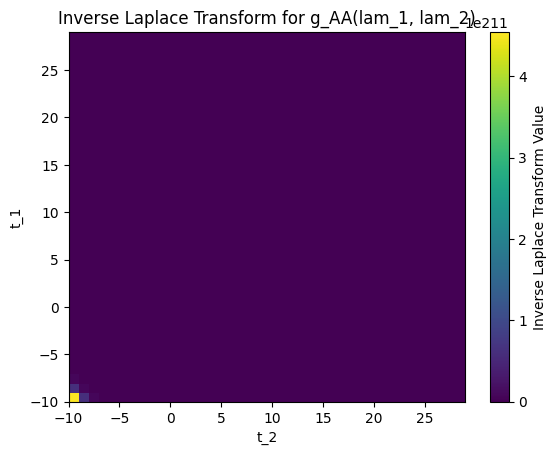

In [57]:
# Define t_1 and t_2 ranges
t_1_range = np.arange(-10, 30, 1)  # t_1 from -10 to 30
t_2_range = np.arange(-10, 30, 1)  # t_2 from -10 to 30

# Compute the inverse Laplace for each combination of t_1 and t_2 using parallelization
results = Parallel(n_jobs=-1)(delayed(inverse_laplace_transform_2d)(g_AA, t1, t2) for t1 in t_1_range for t2 in t_2_range)

# Reshape the results into a 2D array
result_matrix = np.array(results).reshape(len(t_1_range), len(t_2_range))

# Print or visualize the result
print("Inverse Laplace Transform Results (2D array):")
print(result_matrix)

# Optionally visualize the result using a heatmap
import matplotlib.pyplot as plt
plt.imshow(result_matrix, aspect='auto', extent=[t_2_range[0], t_2_range[-1], t_1_range[0], t_1_range[-1]], origin='lower', cmap='viridis')
plt.colorbar(label="Inverse Laplace Transform Value")
plt.xlabel("t_2")
plt.ylabel("t_1")
plt.title("Inverse Laplace Transform for g_AA(lam_1, lam_2)")
plt.show()

In [61]:
results=np.array(results)

In [62]:
new_results=results/sum(results)

In [64]:
new_result_matrix=np.array(new_results).reshape(len(t_1_range), len(t_2_range))

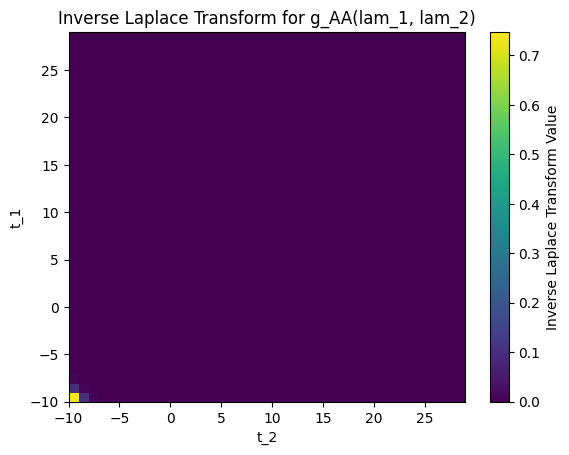

In [66]:
# Optionally visualize the result using a heatmap
import matplotlib.pyplot as plt
plt.imshow(new_result_matrix, aspect='auto', extent=[t_2_range[0], t_2_range[-1], t_1_range[0], t_1_range[-1]], origin='lower', cmap='viridis')
plt.colorbar(label="Inverse Laplace Transform Value")
plt.xlabel("t_2")
plt.ylabel("t_1")
plt.title("Inverse Laplace Transform for g_AA(lam_1, lam_2)")
plt.show()

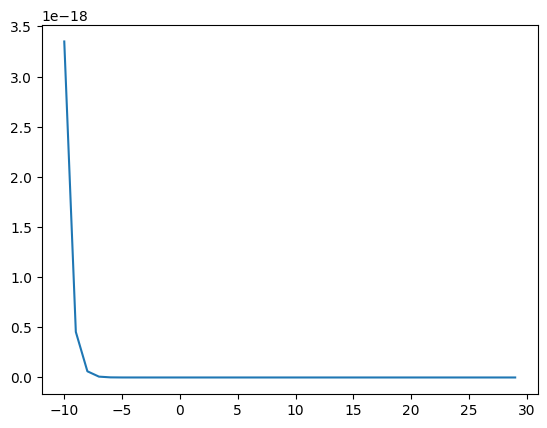

In [65]:
plt.plot(t_2_range,new_result_matrix[20])

In [37]:
np.exp(700)

1.0142320547350045e+304

In [452]:
mu_AA(1,1)

mpf('71.58015463501450178768417813897469128276424239239538931486247321016332058964490995247910173982890841348730059732313276725264260821358432306258333132779242696115703790838070737618600615567574391803387642191291064174310107532615363664198444690678578259521222115696952394597551614532848363623573339998022996739395063014006618283911868509416084454220214569741738246809180312617945373237486539561818009901946794189629543200278772360726251398321062093660272410417505015325347507387583992143459304104291686141318610754896421202306219533669290073230289122920153472289770850441026799898491013444889850632792070549696231491308739608089069170626160883492270524570165470348269357886622414415760618909878082303940046191954333123739556097615957447062084876287126712614142322275812915345908029667118766869704649887259594476338672638705513381680171414798201229712011743314699998356780828557610281674198642722502809198938469858867911841985090331097968294367186114062851048942383876727530231792964005175684871921

In [20]:
# Define a grid of lam1 and lam2 values
###### You have to take lambda_values such that maximum should exists in this range####
lam1_values = np.linspace(-5, 5, 300)
lam2_values = np.linspace(-5, 5, 300)

In [21]:
# Create meshgrid for lam1 and lam2
lam1_grid, lam2_grid = np.meshgrid(lam1_values, lam2_values)

# Compute mu_AA values over the grid
mu_AA_values = np.zeros_like(lam1_grid)

for i in range(len(lam1_values)):
    for j in range(len(lam2_values)):
        mu_AA_values[i, j] = mu_AA(lam1_values[i], lam2_values[j])

# Calculate expression_values as a 2D grid
expression_values = 8 * lam1_grid + 15 * lam2_grid - mu_AA_values

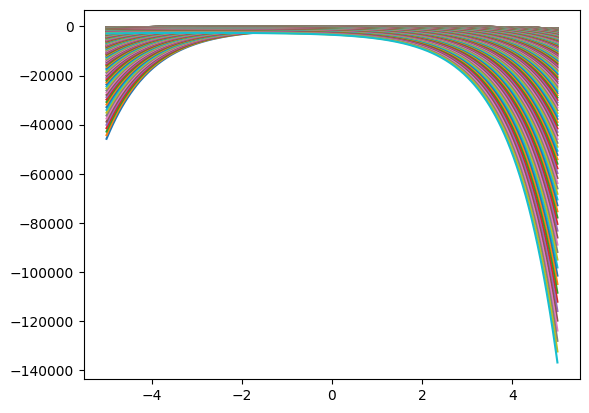

In [22]:
plt.plot(lam2_values,expression_values)

In [23]:
#### This is the value of CGF for given lambda_values####
mu_AA_values = np.zeros((len(lam1_values), len(lam2_values)))

# Loop over all combinations of lam1 and lam2
for i, lam1 in enumerate(lam1_values):
    for j, lam2 in enumerate(lam2_values):
        mu_AA_values[i, j] = mu_AA(lam1, lam2)

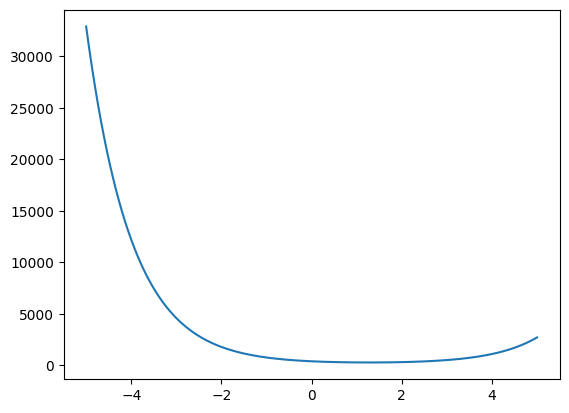

In [24]:
plt.plot(lam2_values,mu_AA_values[10])

In [25]:
####### This is the actual legendre-fenchel transform###
def legendre(q1, q2):
    # Create the meshgrid for lam1_values and lam2_values
    lam1_grid, lam2_grid = np.meshgrid(lam1_values, lam2_values, indexing='ij')  # Use 'ij' for correct shape
    
    # Calculate the expression element-wise
    expression_values = q1 * lam1_grid + q2 * lam2_grid - mu_AA_values
    
    #return expression_values
    # Return the maximum value of the expression
    return np.max(expression_values)

In [26]:
#### This is the value of rate_function###
rate_values = np.zeros((len(Q1_gamma), len(Q2_gamma)))

for i, q1 in enumerate(Q1_gamma):
    for j, q2 in enumerate(Q2_gamma):
        rate_values[i, j] = legendre(q1, q2)

In [27]:
# Flatten the rate_values array so that it can be processed in parallel
rate_values_flat = rate_values.flatten()

# Define the probability function
def prob_fun(a):
    return mpmath.exp(-a)

# Apply prob_fun in parallel to the flattened rate values
results_flat = Parallel(n_jobs=optimal_n_jobs)(delayed(prob_fun)(a) for a in rate_values_flat)
results = np.array(results_flat).reshape(rate_values.shape)

In [28]:
# Compute the total sum of the probabilities for normalization
total_sum = np.sum(results)

# Normalize the results to form a valid probability distribution
prob_theory = results / total_sum

In [29]:
total_sum

mpf('130.859618711815985175106781233965176167709606540161502982392287286593721422518765695741649324190802872180938720703125')

In [30]:
# Define the logarithmic function
def log_fun(a):
    return mpmath.log(a)

# Flatten the 2D array prob_gamma into a 1D array
prob_theory_flat = prob_theory.flatten()

# Apply log_fun in parallel to each element
log_prob_theory_flat = Parallel(n_jobs=optimal_n_jobs)(delayed(log_fun)(a) for a in prob_theory_flat)

# Convert the result back to a 2D array with the original shape of prob_gamma
log_prob_theory = np.array(log_prob_theory_flat).reshape(prob_theory.shape)

In [91]:
len(prob_theory)

42

In [616]:
prob_theory_Q1=np.sum(prob_theory,axis=1)
prob_gamma_Q1=np.sum(prob_gamma,axis=1)

In [618]:
prob_theory_Q2=np.sum(prob_theory,axis=0)
prob_gamma_Q2=np.sum(prob_gamma,axis=0)

In [31]:
plt.plot(Q2_gamma,prob_theory_Q2)
plt.plot(Q2_gamma,prob_gamma_Q2)

NameError: name 'prob_theory_Q2' is not defined

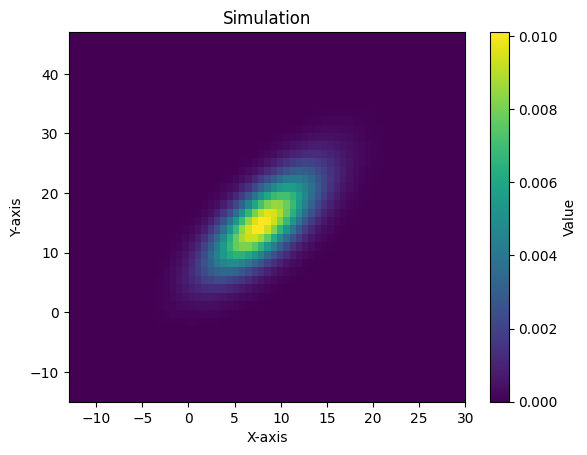

In [32]:
plt.imshow(prob_gamma, extent=(Q1_gamma.min(), Q1_gamma.max(), Q2_gamma.min(), Q2_gamma.max()), origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Value')
plt.title("Simulation")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [34]:
prob_theory = np.array(prob_theory, dtype=np.float64)

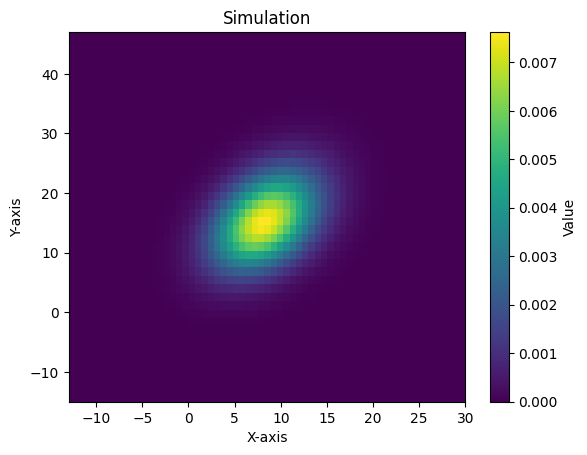

In [ ]:
plt.imshow(prob_theory, extent=(Q1_gamma.min(), Q1_gamma.max(), Q2_gamma.min(), Q2_gamma.max()), origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Value')
plt.title("Theory")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

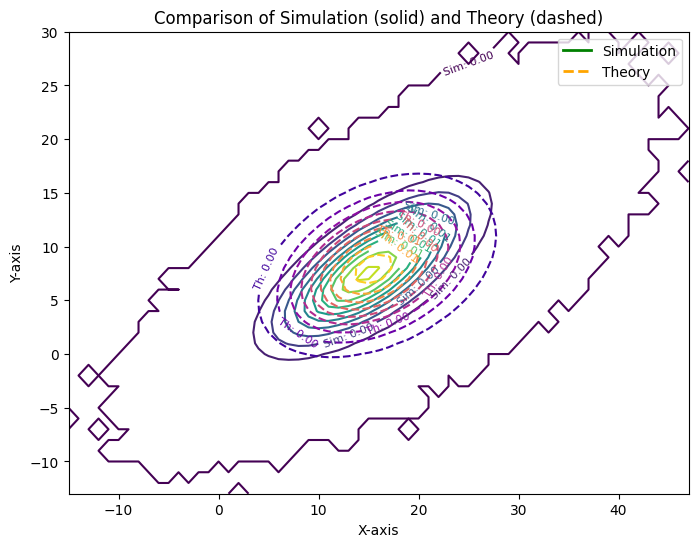

In [41]:
import numpy as np

# Create a meshgrid for Q1_gamma and Q2_gamma
X, Y = np.meshgrid(Q2_gamma, Q1_gamma)

# Plot contours
plt.figure(figsize=(8, 6))

# Contour for Simulation
contour1 = plt.contour(X, Y, prob_gamma, levels=10, cmap='viridis', linewidths=1.5)
plt.clabel(contour1, inline=True, fontsize=8, fmt="Sim: %.2f")

# Contour for Theory
contour2 = plt.contour(X, Y, prob_theory, levels=10, cmap='plasma', linewidths=1.5, linestyles='dashed')
plt.clabel(contour2, inline=True, fontsize=8, fmt="Th: %.2f")

plt.title("Comparison of Simulation (solid) and Theory (dashed)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Legend using proxy artists
from matplotlib.lines import Line2D
custom_lines = [
    Line2D([0], [0], color='green', lw=2, label='Simulation'),
    Line2D([0], [0], color='orange', lw=2, linestyle='dashed', label='Theory')
]
plt.legend(handles=custom_lines, loc='upper right')

plt.show()


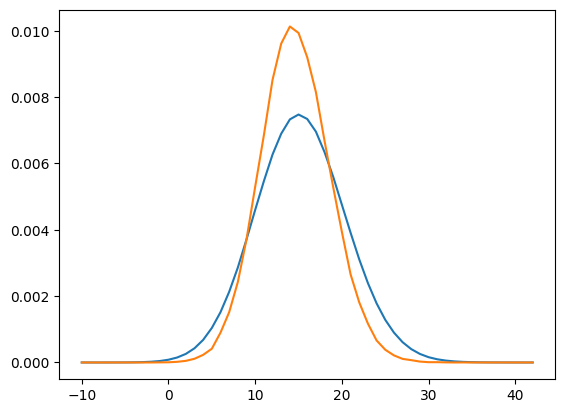

In [609]:
plt.plot(Q2_gamma,prob_theory[18]) ### 5--300
plt.plot(Q2_gamma,prob_gamma[18])

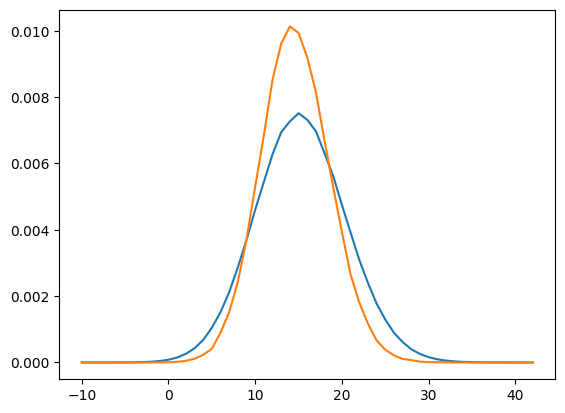

In [ ]:
plt.plot(Q2_gamma,prob_theory[18]) ### 5--150
plt.plot(Q2_gamma,prob_gamma[18])

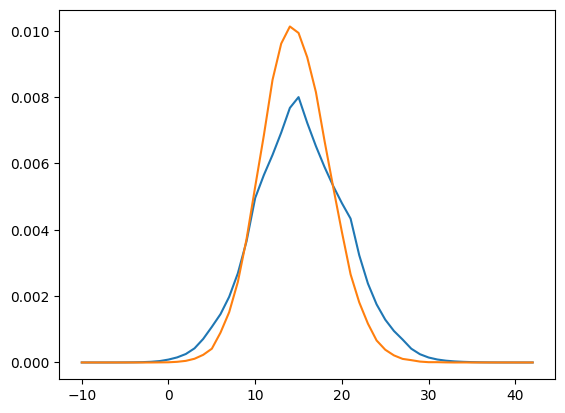

In [580]:
plt.plot(Q2_gamma,prob_theory[18]) ### 5--50
plt.plot(Q2_gamma,prob_gamma[18])

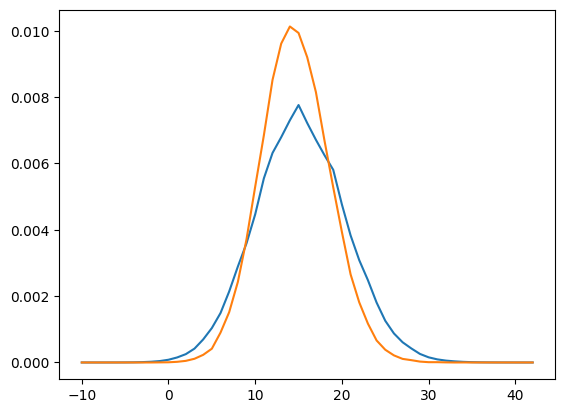

In [556]:
plt.plot(Q2_gamma,prob_theory[18]) ### 5--70
plt.plot(Q2_gamma,prob_gamma[18])

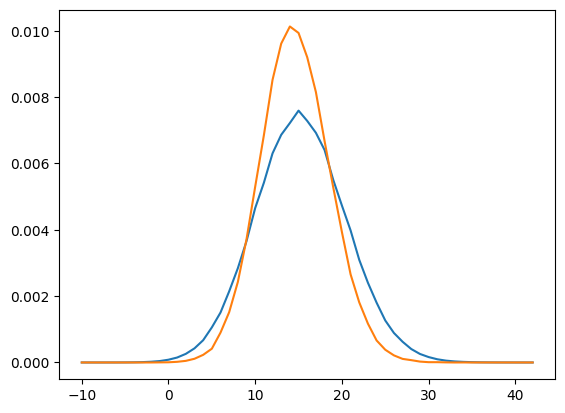

In [544]:
plt.plot(Q2_gamma,prob_theory[18]) ### 5--100
plt.plot(Q2_gamma,prob_gamma[18])

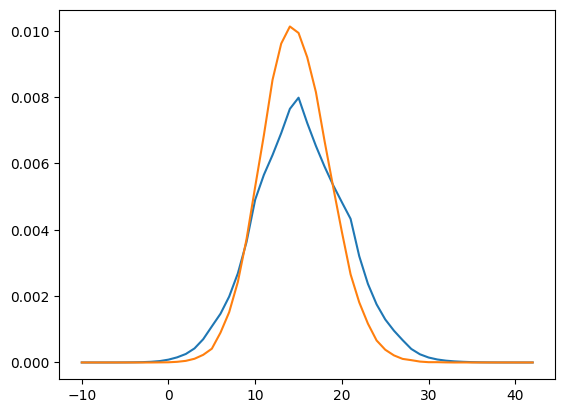

In [532]:
plt.plot(Q2_gamma,prob_theory[18]) ### 20
plt.plot(Q2_gamma,prob_gamma[18])

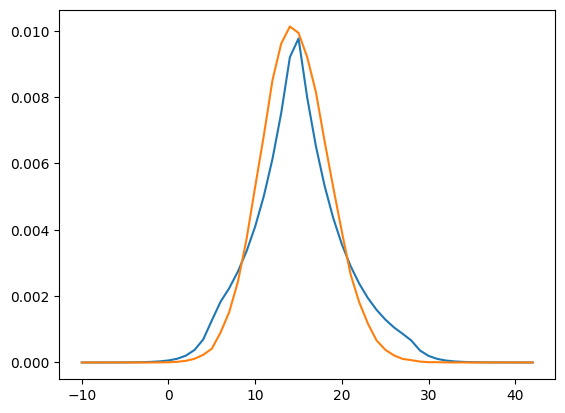

In [518]:
plt.plot(Q2_gamma,prob_theory[18]) ### 20
plt.plot(Q2_gamma,prob_gamma[18])

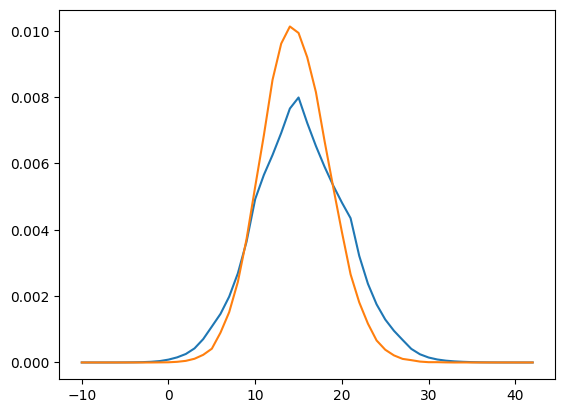

In [ ]:
plt.plot(Q2_gamma,prob_theory[18]) ### 10
plt.plot(Q2_gamma,prob_gamma[18])

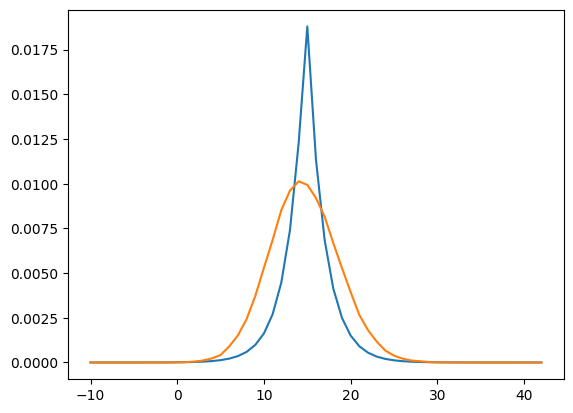

In [ ]:
plt.plot(Q2_gamma,prob_theory[18])  ### 50
plt.plot(Q2_gamma,prob_gamma[18])

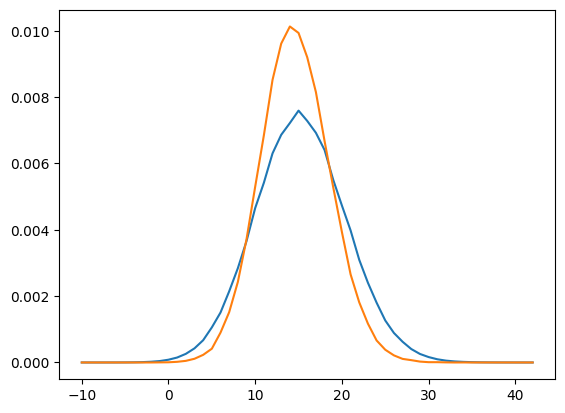

In [482]:
plt.plot(Q2_gamma,prob_theory[18])
plt.plot(Q2_gamma,prob_gamma[18])

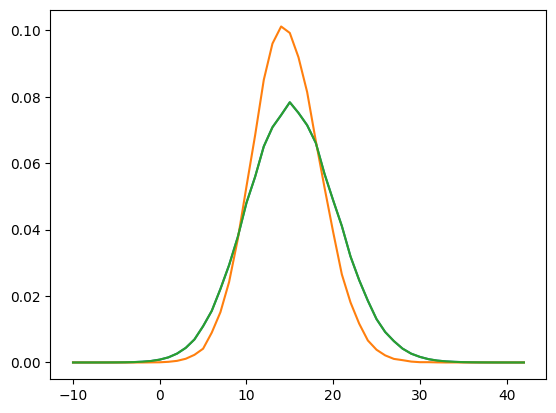

In [ ]:
plt.plot(Q2_gamma,prob_theory[18]/sum(prob_theory[18]))
plt.plot(Q2_gamma,prob_gamma[18]/sum(prob_gamma[18]))
#plt.plot(Q2_gamma,results[18]/sum(results[18]))

In [478]:
sum(results[18])

mpf('12.88973990225595475261268849499589339568927925938623957335948944091796875')

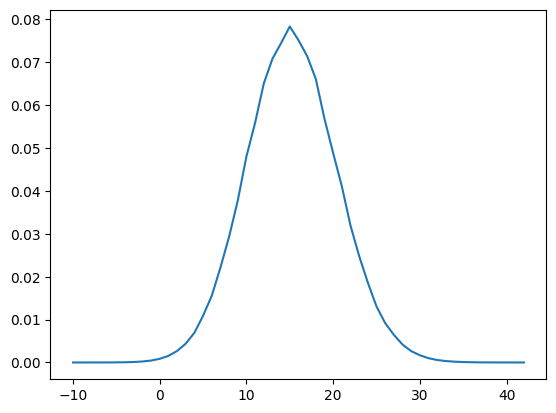

In [479]:
plt.plot(Q2_gamma,results[18]/sum(results[18]))

In [415]:
Q1_gamma[18]

7

In [416]:
sum(prob_theory[18])

mpf('0.096906334231469407115629646573862273039502378344140860302998172947013749620395657571158416556686415576633051557778284029268156976125060822715820634496993204176081392547531612647181136195825777803586391488375555324161003667639851312642777443194454446430155657113465865512506446169856068107895051170820584719604937292834896763764287680999183721498924635571171103573741030307470722250604579497355280790239220589046293955534853737500446182174674795002589970015881010953325767337599344297329572770193783252244551332253505528750301447356294495775405248623413371621944923004183606550092929104659461984616543785171801664513387531011250932176004643548591622297932383612023269790644317532891118222634976671936644065202957739954561809511516979020614041688527123358135692656222385319816674289876739254499759670681669435364223688729334118337166284556421079266756085901029895740617639653296401480607390988484085432481999771164889392801906053631273332611196650955517447695556335051468192380091177989149266833

In [417]:
Q1_gamma[20]

9

In [272]:
a1=Q1_gamma
a2=Q2_gamma
b=prob_theory

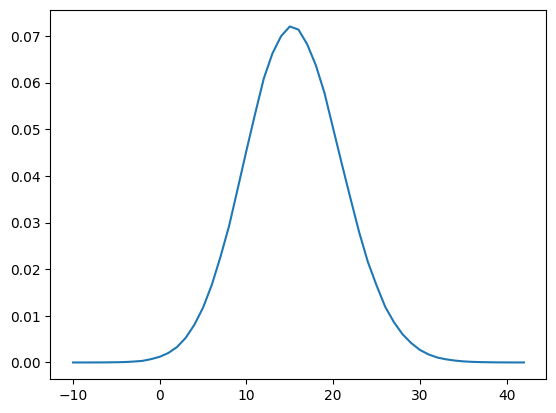

In [274]:
plt.plot(Q_gamma,prob_gamma_Q1)

In [375]:
Q1_gamma_new[16]

7

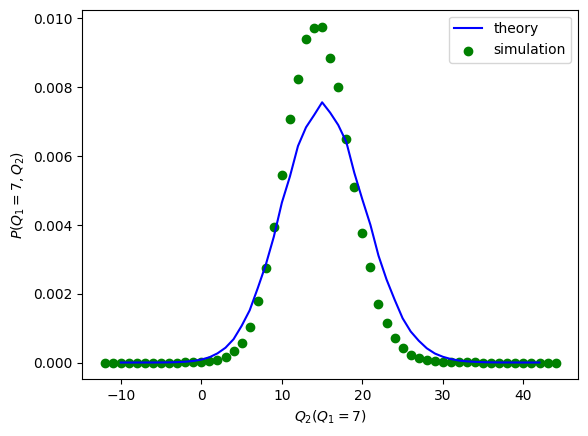

In [381]:
plt.plot(Q2_gamma,prob_theory[18],color='blue',label='theory')
#plt.scatter(Q2_gamma,prob_gamma[16],color='red',label='old definition')
plt.scatter(Q2_gamma_new,prob_gamma_new[16],color='green',label='simulation')
plt.xlabel('$Q_2(Q_1=7)$')
plt.ylabel('$P(Q_1=7,Q_2)$')
plt.legend()

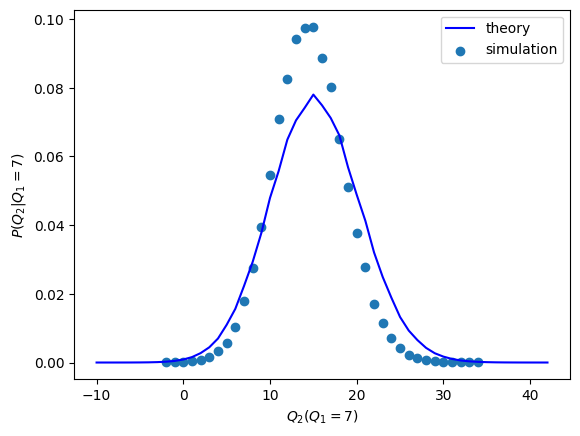

In [382]:
plt.plot(Q2_gamma,prob_theory[18]/np.sum(prob_theory[18]),color='blue',label='theory')
plt.scatter(Q2_Q1_7,prob_simu,label='simulation')
plt.xlabel('$Q_2(Q_1=7)$')
plt.ylabel('$P(Q_2|Q_1=7)$')
plt.legend()

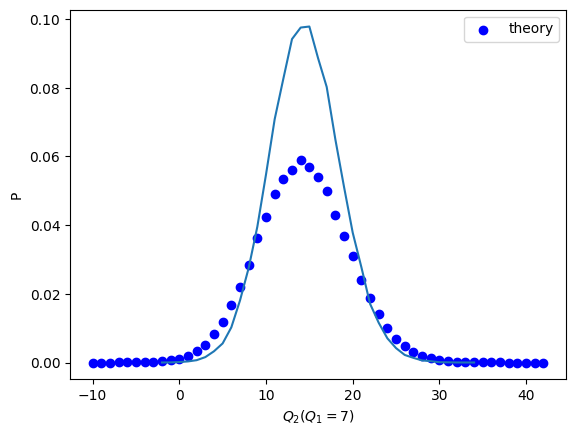

In [356]:
plt.plot(Q2_Q1_7,prob_simu)
plt.scatter(Q2_gamma,prob_theory[16]/a[16],color='blue',label='theory')
plt.xlabel('$Q_2(Q_1=7)$')
plt.ylabel('P')
plt.legend()
#plt.scatter(Q2_gamma_new,prob_gamma_new[16],color='green',label='new definition')

In [ ]:
plt.plot(Q2_gamma,prob_theory[18],color='blue',label='theory')
plt.scatter(Q2_gamma,prob_gamma[18],color='red',label='old definition')
plt.scatter(Q2_gamma_new,prob_gamma_new[18],color='green',label='new definition')
plt.xlabel('$Q_2(Q_1=7)$')
plt.ylabel('P')
plt.legend()

Checking if individual time matching with one time or not?

In [317]:
optimal_n_jobs = multiprocessing.cpu_count()
mpmath.mp.dps=1000

# Constants
D1 = 0.2  # Diffusive Constant
D2=0.01
rho_a = 1.5
rho_b=0.5  # Densitya
L = 2000 # lower limit of particle's position
t = 20 # The time we want to see
N_a=int(L*rho_a)
N_b=int(L*rho_b)
N=N_a+N_b

alpha=2
tau=100

sigma = np.sqrt(  (2 *t *(D1 + D2*(alpha**2)*(tau**2)))   - (D2 *(alpha**2) *(tau**3) *(1-np.exp(-t/tau)) *(3-np.exp(-t/tau)))  )
beta = alpha*tau*(1-np.exp(-t/tau))
sigma_til=np.sqrt(sigma**2 + D2*tau*(beta**2))

In [318]:
bins=np.arange(min(Q2_samples_new), max(Q2_samples_new) + 2)
#bins2=np.arange(min(Q2_samples), max(Q2_samples) + 2)
prob_gamma_Q1, Q_gammas = np.histogram(Q2_samples_new, bins=bins,density=True)
Q_gamma=Q_gammas[:-1]
#Q2_gamma=Q2_gammas[:-1]

In [320]:
Q_gamma[19]

7

In [322]:
prob_gamma_Q1[19]

0.023868

In [248]:
Q_values=Q_gamma

In [249]:
def rate_function(Q):
    a=np.sqrt(2*np.pi)*Q  + np.sqrt(2*np.pi*(Q**2) + 4*(sigma_til**2)*rho_a*rho_b )  
    b=2*sigma_til*rho_a
    return Q*mpmath.log(a) - Q*mpmath.log(b) - (sigma_til*( rho_a*((a/b)-1) + rho_b*((b/a)-1))/np.sqrt(2*np.pi))

def theory_prob(q):
    return mpmath.exp(-rate_function(q))

def log_fun(a):
    return mpmath.log(a)

theoretical_prob=Parallel(n_jobs=optimal_n_jobs)(delayed(theory_prob)(q) for q in Q_values)
log_theoretical_prob=np.array(Parallel(n_jobs=optimal_n_jobs)(delayed(log_fun)(p) for p in theoretical_prob))
total_sum = sum(theoretical_prob)

prob_theory = np.array([res / total_sum  for res in theoretical_prob])
log_prob_theory=np.array(Parallel(n_jobs=optimal_n_jobs)(delayed(log_fun)(p) for p in prob_theory))

In [312]:
prob_gamma

array([[0.e+00, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       ...,
       [0.e+00, 0.e+00, 0.e+00, ..., 1.e-06, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, ..., 0.e+00, 1.e-06, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00]])

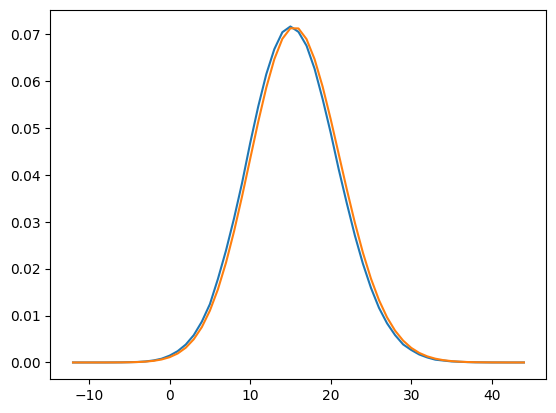

In [136]:
plt.plot(Q_gamma,prob_gamma)
plt.plot(Q_values,prob_theory)